In [61]:
import pandas as pd
import matplotlib.pyplot as plt
polls = pd.read_csv('data/house_polls_merged.csv')
elections = pd.read_csv('data/1976-2022-house.csv')

In [62]:
elections_2018_2022 = pd.read_csv('data/2018-2022-house.csv')
elections_2018_2022.index = [i for i in range(len(elections_2018_2022.values))]
election_groupby = elections_2018_2022.groupby(['year', 'state', 'district'])

In [63]:
print(set(elections_2018_2022['stage']))

{'GEN'}


In [64]:

election_df = pd.DataFrame(columns=['year', 'state', 'district', 'c1', 'c2', 'c1_party', 'c2_party', 'c1_votes', 'c2_votes', 'winner', 'winner_party'])

# print(election_df.shape)
election_groups = list(election_groupby)




# election key: {year, state, district}
# group is tuple of (election key, DF with canidate instances)
# print(groups[0][1].columns)
for group in election_groups:
    print(group)
    df = group[1]
    c1_idx = df['totalvotes'].idxmax()
    print(c1_idx)
    c1 = df['candidate'][c1_idx]
    c1_party = df['party'][c1_idx]
    c1_votes = df['totalvotes'][c1_idx]

    df = df.drop(index=c1_idx)
    try:
        c2_idx = df['totalvotes'].idxmax()
        c2 = df['candidate'][c2_idx]
        c2_party = df['party'][c2_idx]
        c2_votes = df['totalvotes'][c2_idx]
    except:
        c2, c2_party, c2_votes = None, None, None
    
   
    new_row = [group[0][0], group[0][1], group[0][2], c1, c2, c1_party, c2_party, c1_votes, c2_votes, c1, c1_party]
    election_df.loc[len(election_df)] = new_row
    

# print(election_df.columns)
# print(election_df.shape)
# print(election_df.values[:10])



((2018, 'ALABAMA', 1),    year    state state_po  state_fips  state_cen  state_ic    office  \
0  2018  ALABAMA       AL           1         63        41  US HOUSE   
1  2018  ALABAMA       AL           1         63        41  US HOUSE   
2  2018  ALABAMA       AL           1         63        41  US HOUSE   

   district stage runoff  special          candidate       party  writein  \
0         1   GEN    NaN    False      BRADLEY BYRNE  REPUBLICAN    False   
1         1   GEN    NaN    False  ROBERT KENNEDY JR    DEMOCRAT    False   
2         1   GEN    NaN    False            WRITEIN         NaN     True   

    mode  candidatevotes  totalvotes  unofficial   version  fusion_ticket  
0  TOTAL          153228      242617       False  20230706          False  
1  TOTAL           89226      242617       False  20230706          False  
2  TOTAL             163      242617       False  20230706          False  )
0
((2018, 'ALABAMA', 2),    year    state state_po  state_fips  state_cen 

In [65]:

election_df.to_csv('data/elections-2018-2022.csv', index=False)

In [66]:
polls = pd.read_csv('data/house_polls_merged.csv')
polls['candidate_name'] = polls['candidate_name'].apply(lambda x: x.upper())
polls['state'] = polls['state'].apply(lambda x: x.upper())

print(polls.columns)
groupby = polls.groupby(['state', 'seat_number', 'cycle'])

groups = list(groupby)


# atts that good be good (beyond obvious):
# poll_id, pollster_id, sponsor_id, pollster_rating_id, pollscore, methodology, transparency score, sample_size, partisan
# sample_size

poll_df = pd.DataFrame(columns=['year', 'state', 'district', 'c1', 'c2', 'c1_party', 'c2_party', 'c1_pct', 'c2_pct'])


print(groups[0][0])
for group in groups:
    df = group[1]
    c1_idx = df['pct'].idxmax()
    c1 = df['candidate_name'][c1_idx]
    c1_party = df['party'][c1_idx]
    c1_pct = df['pct'][c1_idx]

    df = df.drop(index=c1_idx)
    try:
        c2_idx = df['pct'].idxmax()
        c2 = df['candidate_name'][c2_idx]
        c2_party = df['party'][c2_idx]
        c2_pct = df['pct'][c2_idx]
    except:
        c2, c2_party, c2_votes = None, None, None
    
   
    new_row = [group[0][2], group[0][0], group[0][1], c1, c2, c1_party, c2_party, c1_pct, c2_pct]
    poll_df.loc[len(poll_df)] = new_row





Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'numeric_grade', 'pollscore', 'methodology', 'transparency_score',
       'state', 'start_date', 'end_date', 'sponsor_candidate_id',
       'sponsor_candidate', 'sponsor_candidate_party', 'endorsed_candidate_id',
       'endorsed_candidate_name', 'endorsed_candidate_party', 'question_id',
       'sample_size', 'population', 'subpopulation', 'population_full',
       'tracking', 'created_at', 'notes', 'url', 'url_article', 'url_topline',
       'url_crosstab', 'source', 'internal', 'partisan', 'race_id', 'cycle',
       'office_type', 'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'hypothetical', 'party', 'answer', 'candidate_id', 'candidate_name',
       'pct'],
      dtype='object')
('ALABAMA', 2, 2024)


In [67]:
print(poll_df.columns)
print(election_df.columns)

print(len(poll_df.values))



Index(['year', 'state', 'district', 'c1', 'c2', 'c1_party', 'c2_party',
       'c1_pct', 'c2_pct'],
      dtype='object')
Index(['year', 'state', 'district', 'c1', 'c2', 'c1_party', 'c2_party',
       'c1_votes', 'c2_votes', 'winner', 'winner_party'],
      dtype='object')
484


363


<Axes: >

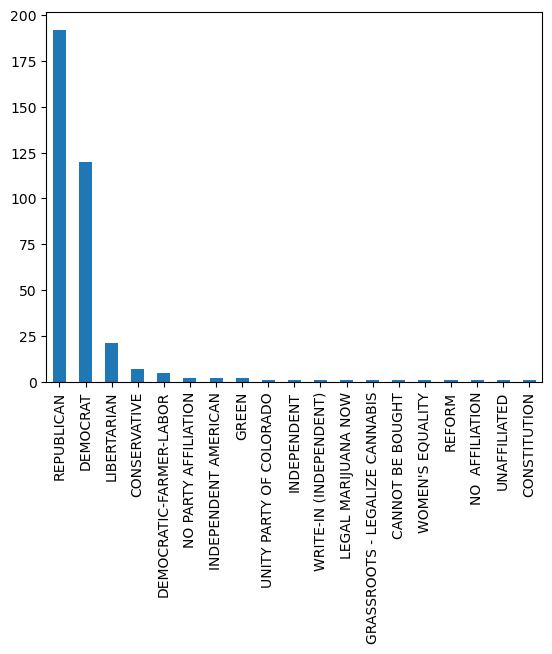

In [68]:
# joined_df = election_df.join(poll_df, on=['year', 'state', 'district'], how='inner')

joined_df = pd.merge(election_df, poll_df, on=['year', 'state', 'district'])

print(len(joined_df.values))

joined_df.to_csv('joined_table.csv')


joined_df['winner_party'].value_counts().plot(kind='bar')


